# Data Wrangling and Analysis - Twitter Data @WeRateDogs

## By Thu Trang Bui


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#step1">Step 1 - Gather data from various sources</a></li>
<li><a href="#assess">Step 2 - Assessing data</a></li>
<li><a href="#clean">Step 3 - Cleaning data</a></li>
<li><a href="#analysis">Step 4 - Analysis and visualisation</a></li>   
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Thus, in the project, the dataset is gathered from a variety of sources and in a variety of formats. After that, the dataset has to be assessed in terms of its quality and tidiness before being cleaned to be a dataset at a good quality. This process is called data wrangling. This report requires all data wrangling steps: gather, assess, and clean, before storing into a complete data file.

This project wrangle, analyse and visualise a dataset about the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators are always greater than 10, because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The goal of this project is to wrangle the datasets about Twitter WeRateDogs to find interesting insights.

<a id='step1'></a>
## Step 1 - Gather data from various sources

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns

**Gather data from Twitter Archive data**

In [2]:
# Read twitter-archive-enhanced.csv file by pandas read_csv

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

**Gather data from a url link using requests library**

In [3]:
# using requests library to download the file image_predictions.tsv from the given url link

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

**Gather data from Twitter API with API keys not disclosed here**

In [10]:
# Using tweepy to download data from Twitter with Twitter API
# download and put data into the file tweet_json.txt
# seperate by a new line (\n)

consumer_key = 'myAPIkey'
consumer_secret = 'this is a secret'
access_token = 'myaccesstoken'
access_secret = 'this is also a secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
           
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 499
Rate limit reached. Sleeping for: 615


In [5]:
# Reading JSON file to dataframe
tweet_list = []

json_file = open('tweet_json.txt', "r")

for line in json_file:
    try:
        tweet = json.loads(line)
        tweet_list.append(tweet)
    except:
        continue
        
json_file.close()

tweet_df = pd.DataFrame()

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))

<a id='assess'></a>
## Step 2 - Assessing data

**Twitter Archive Data**

In [6]:
# looking at the few first lines of twitter archive data

twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


>All columns of dog stage should be combined into 1 variable of dog_stage. However, there are some entries with multiple dog stages. Thus, these rows should be labelled "multiple". Otherwise, we create a master dataset that doesn't follow properly the principles of Data Tidy and we risk to lose important data weakening our findings.

In [7]:
# looking at twitter archive data with info()

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>Some columns have wrong data types, such as timestamp (datetime datatype instead of string), source, tweet_id, etc. In addition, the rating_numerator datatype should be float, instead of integer.

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


>Observations: 
>- The ratings always have a denominator of 10. Thus, the rating_denominator should always be 10. However, there are values which are not 10, which should be investigated.
>- rating_numerator has the max value of 1776, which is far greater than 10 and should be suspected. 
>- Another issue is that we only want original ratings (no retweets) that have images, but it can be seen that the columns retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id have non-null values. Thus, we have to remove the rows with non-null values in these columns. After removing the rows with non-null values in these columns, we will also remove those columns from the dataset since they are not necessary for the analysis.

In [9]:
# check the values of rating_denominator

twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
# check the values of rating_numerator

twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
# the number of rows which retweet status and reply status is not null

print(twitter_archive.retweeted_status_id.notnull().sum())
print(twitter_archive.in_reply_to_status_id.notnull().sum())

181
78


In [12]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None



>It is noticed that the name column has some values like a, an, the, etc. which needs further assessment.

In [13]:
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [14]:
# create weird_name - a data frame to filter all the rows in twitter_archive where the name is not a real name

weird_name = twitter_archive.query('name == ["a", "actually", "all", "an", "by", "getting" , "his" ,   "incredibly", "infuriating" , "just", "life", "light", "mad", "my", "not", "officially", "old", "one", "quite", "space", "such", "the", "this", "unacceptable", "very"]')

In [15]:
weird_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 22 to 2354
Data columns (total 17 columns):
tweet_id                      109 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     109 non-null object
source                        109 non-null object
text                          109 non-null object
retweeted_status_id           5 non-null float64
retweeted_status_user_id      5 non-null float64
retweeted_status_timestamp    5 non-null object
expanded_urls                 109 non-null object
rating_numerator              109 non-null int64
rating_denominator            109 non-null int64
name                          109 non-null object
doggo                         109 non-null object
floofer                       109 non-null object
pupper                        109 non-null object
puppo                         109 non-null object
dtypes: float64(4), int64(3), object(10)
memory usag

In [16]:
# filter the rows in weird_name data where the text columns containing the word "name"
# indicating that the actual dog name is put in the text column

weird_name.loc[(twitter_archive.text.str.contains('name'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None


In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Image predictions data**

In [18]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


>p2_conf and p3_conf are how confident the algorithm is in its #2 and #3 prediction. However, the values of these columns are too low, where the median of p2_conf is  0.118 and p3_conf is  0.05, and their max is also really low. Thus, the confident level is very low in these predictions. Thus, we should remove the columns p2_conf and p3_conf and their related columns and rely on p1_conf. 

**Tweets_json data**

In [22]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8113,37404
1,892177421306343426,6011,32146
2,891815181378084864,3981,24235
3,891689557279858688,8279,40706
4,891327558926688256,8974,38938


In [23]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2329,666049248165822465,41,103
2330,666044226329800704,135,286
2331,666033412701032449,43,120
2332,666029285002620928,46,124
2333,666020888022790149,488,2490


In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [25]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.334000e+03,2334.000000,2334.000000
mean,7.419439e+17,2848.311482,7795.288775
std,6.819580e+16,4821.535030,12097.133184
min,6.660209e+17,1.000000,0.000000
25%,6.782926e+17,574.250000,1354.250000
50%,7.184574e+17,1333.500000,3396.000000
75%,7.986600e+17,3326.000000,9561.750000
max,8.924206e+17,81857.000000,161545.000000


In [26]:
tweet_df.tweet_id.isnull().sum()

0

In [27]:
tweet_df.tweet_id.value_counts()

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
670093938074779648    1
756651752796094464    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
759923798737051648    1
685315239903100929    1
818259473185828864    1
                     ..
870308999962521604    1
720775346191278080    1
879492040517615616    1
775733305207554048    1
667911425562669056    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
6788002836490690

In [28]:
tweet_df.favorite_count.isnull().sum()

0

In [29]:
tweet_df.retweet_count.isnull().sum()

0

### Final assessment (detailed problems in quality and tidiness to instruct the cleaning step)

**Quality**

> tweet_archive data

- 1. Remove rows with not null retweets and tweet replies to assure that each row represents a unique tweet. After that, delete these columns of retweets, replies and retweeted_status_timestamp.
- 2. Examine the rows with denominator rating not equalling 10. If error due to typo, correct it.
- 3. Remove rows with numerator rating < 10. Also, rating_numerator should have the datatype of float instead of int. In addition, we should fix the rating numerators with decimals but are not shown with full float. Besides, some tweets have the rating numerators and denominators in the text column, which should be corrected. Finally, remove column "rating_denominator" as it is no longer necessary.

- 4. Rename columns to be more explanatory: "timestamp" to "tweeted_timestamp", "text" to "tweeted_text", "name" to "dog_name", etc.
- 5. Correct the dog names in the rows where name is in weird_name and the real name is put in the text after the word "name".
- 6. Correct the data types for some variables such as timestamp, tweet_id, dog stages.
- 7. Change the source to be clearer.


> image_predictions data

- 1. Rename p1, p1_conf column.
- 2. Remove the columns p2, p2_conf, p2_dog and p3, p3_conf, p3_dog as the p2_conf and p3_conf are very low.
- 3. Remove column "jpg_url" as this data exist in twitter_archive data.

**Tidiness**

- 1. Create only 1 dog_stage variable and remove individual dog stage variables (doggo, pupper, puppo, floofer). For the entries with multiple dog stages, label them as "multiple stages" to ensure tidiness.

- 2. Merge tweets data and image_predictions into twitter_archive dataframe.


<a id='clean'></a>
## Step 3 - Cleaning data

### Twitter archive data

In [30]:
# Create a copy of twitter_achive dataframe

twitter_archive_clean = twitter_archive.copy()

**Define**
> Quality issue 1. Remove rows with retweets and replies
> Then remove the columns

In [31]:
# Code remove rows with retweets

twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index, inplace = True)

In [32]:
# Test
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

In [33]:
# Code remove rows with replies

twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)

In [34]:
# Test
twitter_archive_clean.in_reply_to_status_id.notnull().sum()

0

In [35]:
# Code dropping columns about retweets and replies

drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']

twitter_archive_clean.drop(drop_cols, axis = 1, inplace = True)

In [36]:
# Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**Define**
> Quality issue 2. Examine the rows where the rating denominator != 10

In [37]:
# Set to see all the text

pd.set_option('display.max_colwidth', -1)

In [38]:
# Code

twitter_archive_clean.rating_denominator.value_counts()

10     2080
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [39]:
not_10_denominator = twitter_archive_clean.query('rating_denominator != 10')
not_10_denominator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None


From the above table, it can be seen clearly that some entries with rating_denominator are authentic. For instance, tweet_id 820690176645140481 has many floops in the image, thus it receives rating of 84/70 (numerator is 84 and denominator is 70). For such similar rows, we will change the rating_numerator to have a standardised denominator of 10. For wrong row with tweet id 810984652412424192, 24/7 is not the rating (Meet Sam. She smiles 24/7), thus values in the rating columns are not correct, so we will drop.

In [40]:
print(not_10_denominator.index)

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')


In [41]:
# Code to delete one row with wrong information (tweet id 810984652412424192)

twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_denominator == 7].index, inplace = True)

In [42]:
# test
twitter_archive_clean.rating_denominator.value_counts()

10     2080
50     3   
11     2   
80     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [43]:
# correct the wrong values in the rating columns based on the content of text column
# index 1068
twitter_archive_clean.loc[1068, ['rating_numerator']] = 14

twitter_archive_clean.loc[1068, ['rating_denominator']] = 10

# index 1165
twitter_archive_clean.loc[1165, ['rating_numerator']] = 13

twitter_archive_clean.loc[1165, ['rating_denominator']] = 10

# index 1662
twitter_archive_clean.loc[1662, ['rating_numerator']] = 10

twitter_archive_clean.loc[1662, ['rating_denominator']] = 10

# index 2335
twitter_archive_clean.loc[2335, ['rating_numerator']] = 9

twitter_archive_clean.loc[2335, ['rating_denominator']] = 10

In [44]:
# Test
twitter_archive_clean.rating_denominator.value_counts()

10     2084
50     3   
80     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

**Define**
> Quality issue 3. Rating_numerator should have the datatype of float instead of int. In addition, we should fix the rating numerators with decimals but are not shown with full float. Besides, some tweets have the rating numerators and denominators in the text column, which should be corrected. After all, we will create a column rating to standardise the denominator column (rating_numerator*10/rating_denominator) and delete the column rating_denominator.

In [45]:
# Code to see the values in rating_numerator

twitter_archive_clean.rating_numerator.value_counts()

12      486
10      437
11      413
13      288
9       153
8       98 
7       51 
14      39 
5       34 
6       32 
3       19 
4       15 
2       9  
1       4  
26      1  
44      1  
165     1  
60      1  
50      1  
144     1  
80      1  
84      1  
88      1  
121     1  
204     1  
420     1  
1776    1  
27      1  
45      1  
75      1  
99      1  
0       1  
Name: rating_numerator, dtype: int64

In [46]:
# Code to find the entries with decimals in rating in 'text' column

twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/home/cunu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [47]:
# Change type of rating numerator to float instead of int

twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')

In [48]:
# Correct the rating_numerator for specific tweets with decimal rating

twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [49]:
# Test

twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/home/cunu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,None,None,None,None


In [50]:
# Code to see values in rating numerator

twitter_archive_clean.rating_numerator.value_counts()

12.00      486
10.00      437
11.00      413
13.00      288
9.00       153
8.00       98 
7.00       51 
14.00      39 
5.00       33 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
13.50      1  
84.00      1  
0.00       1  
420.00     1  
50.00      1  
1776.00    1  
60.00      1  
44.00      1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
121.00     1  
9.75       1  
99.00      1  
204.00     1  
45.00      1  
165.00     1  
80.00      1  
Name: rating_numerator, dtype: int64

In [51]:
# create a column rating aiming to standardise the denominator 

twitter_archive_clean['rating'] = (twitter_archive_clean['rating_numerator']*10)/(twitter_archive_clean['rating_denominator'])

In [52]:
# test

twitter_archive_clean['rating'].value_counts()

12.00      490
10.00      439
11.00      418
13.00      288
9.00       154
8.00       98 
7.00       51 
14.00      39 
5.00       33 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
9.75       1  
0.00       1  
11.26      1  
11.27      1  
13.50      1  
420.00     1  
1776.00    1  
Name: rating, dtype: int64

In [53]:
# drop values of rating which is less than 10

twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating < 10].index, inplace = True)

In [54]:
# Test

twitter_archive_clean.rating.value_counts()

12.00      490
10.00      439
11.00      418
13.00      288
14.00      39 
420.00     1  
1776.00    1  
11.27      1  
11.26      1  
13.50      1  
Name: rating, dtype: int64

In [55]:
# Code to drop column denominator and numerator as not necessary

twitter_archive_clean.drop(['rating_denominator', 'rating_numerator'], axis = 1, inplace = True)

In [56]:
# Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 2350
Data columns (total 11 columns):
tweet_id         1679 non-null int64
timestamp        1679 non-null object
source           1679 non-null object
text             1679 non-null object
expanded_urls    1676 non-null object
name             1679 non-null object
doggo            1679 non-null object
floofer          1679 non-null object
pupper           1679 non-null object
puppo            1679 non-null object
rating           1679 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 157.4+ KB


**Define**
> Quality issue 4. Rename columns to be more explanatory

In [57]:
# Code

twitter_archive_clean.rename(columns = {'timestamp': 'tweeted_timestamp', 'text': 'tweeted_text',\
             'name': 'dog_name'}, inplace=True)

In [58]:
# Test

twitter_archive_clean.head(2)

,tweet_id,tweeted_timestamp,source,tweeted_text,expanded_urls,dog_name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13.0


**Define**
>Quality issue 5. Change the name of the dog where available

In [59]:
# Code

named_in_text = weird_name.loc[(twitter_archive.text.str.contains('named'))]
name_is_in_text = weird_name.loc[(twitter_archive.text.str.contains('name is'))]

named_in_text_list = named_in_text['text'].tolist()
name_is_in_text_list = name_is_in_text['text'].tolist()
no_name_in_text_list = weird_name['text'].tolist()    

In [60]:
for name in named_in_text_list:
    mask = twitter_archive_clean.tweeted_text == name
    name_column = 'dog_name'
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", name)

In [61]:
for name in name_is_in_text_list:
    mask = twitter_archive_clean.tweeted_text == name
    name_column = 'dog_name'
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", name)

In [62]:
for name in no_name_in_text_list:
    mask = twitter_archive_clean.tweeted_text == name
    name_column = 'dog_name'
    twitter_archive_clean.loc[mask, name_column] = "None"

In [63]:
# Test
twitter_archive_clean.dog_name.sort_values()

1021    Abby     
938     Ace      
1933    Acro     
1327    Adele    
1934    Aiden    
77      Aja      
480     Akumi    
820     Al       
1954    Albert   
875     Albert   
412     Albus    
144     Albus    
1115    Aldrick  
2046    Alejandro
374     Alexander
486     Alf      
367     Alfie    
1616    Alfie    
858     Alfie    
51      Alfy     
201     Alice    
1495    Amber    
1334    Ambrose  
2078    Amy      
2195    Amélie   
780     Anakin   
2144    Andru    
2084    Andy     
849     Angel    
443     Anna     
        ...      
321     Wilson   
2200    Winifred 
789     Winnie   
263     Winnie   
563     Winnie   
927     Winnie   
280     Winston  
816     Winston  
559     Winston  
2133    Winston  
1243    Winston  
986     Winston  
407     Winston  
877     Wishes   
410     Wyatt    
174     Wyatt    
1451    Wyatt    
43      Yogi     
622     Yogi     
1409    Yukon    
1332    Zara     
17      Zeke     
181     Zeke     
547     Zeke     
1210    Ze

In [64]:
# Changing "None" to NaN (null name)

twitter_archive_clean.dog_name = twitter_archive_clean.dog_name.replace('None', np.NaN)

In [65]:
# Test

twitter_archive_clean.dog_name.isnull().sum()

543

**Define**
>Quality issue 6. Correct data types

In [66]:
# Code

twitter_archive_clean['tweeted_timestamp'] = pd.to_datetime(twitter_archive_clean['tweeted_timestamp'])

In [67]:
# Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 2350
Data columns (total 11 columns):
tweet_id             1679 non-null int64
tweeted_timestamp    1679 non-null datetime64[ns, UTC]
source               1679 non-null object
tweeted_text         1679 non-null object
expanded_urls        1676 non-null object
dog_name             1136 non-null object
doggo                1679 non-null object
floofer              1679 non-null object
pupper               1679 non-null object
puppo                1679 non-null object
rating               1679 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(8)
memory usage: 157.4+ KB


**Define**
>Quality issue 7. Change the sources to be easily readable

In [68]:
# Code

twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [69]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

In [70]:
# Test

twitter_archive_clean.source.value_counts()

Twitter for iPhone    1565
Vine                  84  
Twitter Web Client    20  
TweetDeck             10  
Name: source, dtype: int64

**Define**
> Tidiness issue 1. Create only 1 dog_stage variable and remove individual dog stage variables (doggo, pupper, puppo, floofer).  For the entries with multiple dog stages, label them as "multiple stages" to ensure tidiness.

In [71]:
# Code to create a dog_stage variable with the value equalling the stage of doggo, pupper, puppo, or floofer.

twitter_archive_clean = twitter_archive_clean.reset_index()
del twitter_archive_clean['index']

twitter_archive_clean['dog_stage'] = 'NaN'

for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.loc[i, 'doggo'] == 'doggo':
        twitter_archive_clean.loc[i, 'dog_stage'] = 'doggo'
    elif twitter_archive_clean.loc[i, 'floofer'] == 'floofer':
        twitter_archive_clean.loc[i, 'dog_stage'] = 'floofer'
    elif twitter_archive_clean.loc[i, 'pupper'] == 'pupper':
        twitter_archive_clean.loc[i, 'dog_stage'] = 'pupper'
    elif twitter_archive_clean.loc[i, 'puppo'] == 'puppo':
        twitter_archive_clean.loc[i, 'dog_stage'] = 'puppo'
    else:
        twitter_archive_clean.loc[i, 'dog_stage'] = 'None'

In [72]:
# code to find the rows in which the dog has multiple stages

multi_list = []

for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.doggo[i] == 'doggo' and (twitter_archive_clean.floofer[i] == 'floofer' \
                                                   or twitter_archive_clean.pupper[i] == 'pupper'\
                                                   or twitter_archive_clean.puppo[i] == 'puppo'):
        multi_list.append(i)

print(multi_list)
len(multi_list)

[154, 161, 356, 413, 443, 532, 557, 678, 815, 855]


10

**In the tweets with tweet index equalling 154, 161, 356, 413, 443, 532, 557, 678, 815, 855, the dog has multiple stages. Thus, we need to correct the dog stage in these rows.**

In [73]:
# tweet index no 154    
twitter_archive_clean.loc[154, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo
floofer      None 
pupper       None 
puppo        puppo
dog_stage    doggo
Name: 154, dtype: object

In [74]:
# check the text to see if the dog is doggo or puppo or both

twitter_archive_clean.tweeted_text[154]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [75]:
# Correcting to "puppo"

twitter_archive_clean.loc[154, 'dog_stage'] = 'puppo'

In [76]:
# tweet index 161
twitter_archive_clean.loc[161, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo  
floofer      floofer
pupper       None   
puppo        None   
dog_stage    doggo  
Name: 161, dtype: object

In [77]:
# check the text to see if the dog is doggo or floofer or both

twitter_archive_clean.tweeted_text[161]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [78]:
# Correcting to "floofer"
twitter_archive_clean.loc[161, 'dog_stage'] = 'floofer'

In [79]:
# Index 356
twitter_archive_clean.loc[356, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 356, dtype: object

In [80]:
# check the text to see if the dog is doggo or pupper or both
twitter_archive_clean.tweeted_text[356]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [81]:
# Correcting to "pupper"

twitter_archive_clean.loc[356, 'dog_stage'] = 'pupper'

In [82]:
# Index 413

twitter_archive_clean.loc[413, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 413, dtype: object

In [83]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[413]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [84]:
# labelling as "multiple"

twitter_archive_clean.loc[413, 'dog_stage'] = 'multiple'

In [85]:
# Index 443

twitter_archive_clean.loc[443, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 443, dtype: object

In [86]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[443]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [87]:
# Correct to pupper

twitter_archive_clean.loc[443, 'dog_stage'] = 'pupper'

In [88]:
# Index 532

twitter_archive_clean.loc[532, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 532, dtype: object

In [89]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[532]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

dog_stage is already doggo.

In [90]:
# Index 557

twitter_archive_clean.loc[557, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 557, dtype: object

In [91]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[557]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [92]:
# Correcting to multiple stages

twitter_archive_clean.loc[557, 'dog_stage'] = 'multiple'

In [93]:
# Index 678

twitter_archive_clean.loc[678, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 678, dtype: object

In [94]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[678]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [95]:
# Correcting to multiple

twitter_archive_clean.loc[678, 'dog_stage'] = 'multiple'

In [96]:
# Index 815

twitter_archive_clean.loc[815, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 815, dtype: object

In [97]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[815]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [98]:
# Correcting to multiple

twitter_archive_clean.loc[815, 'dog_stage'] = 'multiple'

In [99]:
# Index 855
twitter_archive_clean.loc[855, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']]

doggo        doggo 
floofer      None  
pupper       pupper
puppo        None  
dog_stage    doggo 
Name: 855, dtype: object

In [100]:
# check the text to see if the dog is doggo or pupper or both

twitter_archive_clean.tweeted_text[855]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [101]:
# Correcting to multiple

twitter_archive_clean.loc[855, 'dog_stage'] = 'multiple'

In [102]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [103]:
# Test

twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

twitter_archive_clean.head(2)

,tweet_id,tweeted_timestamp,source,tweeted_text,expanded_urls,dog_name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,None


In [104]:
twitter_archive_clean.dog_stage.value_counts()

None        1387
pupper      184 
doggo       70  
puppo       23  
floofer     10  
multiple    5   
Name: dog_stage, dtype: int64

### Image predictions data

In [105]:
image_predictions_clean = image_predictions.copy()

**Define**
> 1. Rename p1, p1_conf column.

In [106]:
# Code

image_predictions_clean.rename(columns = {'p1':'prediction_of_dog_breed', 'p1_conf':'confidence_of_prediction', 'p1_dog':'predicted_dog'}, inplace=True)

In [107]:
# Test

image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                    2075 non-null int64
jpg_url                     2075 non-null object
img_num                     2075 non-null int64
prediction_of_dog_breed     2075 non-null object
confidence_of_prediction    2075 non-null float64
predicted_dog               2075 non-null bool
p2                          2075 non-null object
p2_conf                     2075 non-null float64
p2_dog                      2075 non-null bool
p3                          2075 non-null object
p3_conf                     2075 non-null float64
p3_dog                      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Define**
> 2. Remove the columns p2, p2_conf, p2_dog and p3, p3_conf, p3_dog as the p2_conf and p3_conf are very low.

> 3. Remove column jpg_url since it is redundant.
     

In [108]:
# Code

image_predictions_clean.drop(['jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf'], inplace=True, axis=1)

In [109]:
# Test

image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                    2075 non-null int64
img_num                     2075 non-null int64
prediction_of_dog_breed     2075 non-null object
confidence_of_prediction    2075 non-null float64
predicted_dog               2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 66.9+ KB


This is the end of the cleaning data. Now we will merge all the data frames into 1 dataframe and store to a new file.

**Merge data**

In [110]:
# Code create a copy of tweet_df

tweet_clean = tweet_df.copy()

In [111]:
# Create a twitter_master_df by merging twitter_archive_clean dataframe with image_predictions_clean dataframe on tweet_id

twitter_master_df = pd.merge(left = twitter_archive_clean, right = image_predictions_clean, on = 'tweet_id', how = 'left')

In [112]:
# Test

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1678
Data columns (total 12 columns):
tweet_id                    1679 non-null int64
tweeted_timestamp           1679 non-null datetime64[ns, UTC]
source                      1679 non-null category
tweeted_text                1679 non-null object
expanded_urls               1676 non-null object
dog_name                    1136 non-null object
rating                      1679 non-null float64
dog_stage                   1679 non-null category
img_num                     1560 non-null float64
prediction_of_dog_breed     1560 non-null object
confidence_of_prediction    1560 non-null float64
predicted_dog               1560 non-null object
dtypes: category(2), datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 148.0+ KB


In [113]:
# Merging twitter_master_df with tweet_clean dataframe on tweet_id

twitter_master_df = pd.merge(left = twitter_master_df, right = tweet_clean, on = 'tweet_id', how = 'inner')

In [114]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1672
Data columns (total 14 columns):
tweet_id                    1673 non-null int64
tweeted_timestamp           1673 non-null datetime64[ns, UTC]
source                      1673 non-null category
tweeted_text                1673 non-null object
expanded_urls               1670 non-null object
dog_name                    1130 non-null object
rating                      1673 non-null float64
dog_stage                   1673 non-null category
img_num                     1554 non-null float64
prediction_of_dog_breed     1554 non-null object
confidence_of_prediction    1554 non-null float64
predicted_dog               1554 non-null object
retweet_count               1673 non-null int64
favorite_count              1673 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), float64(3), int64(3), object(5)
memory usage: 173.6+ KB


In [115]:
# Test

twitter_master_df.head()

,tweet_id,tweeted_timestamp,source,tweeted_text,expanded_urls,dog_name,rating,dog_stage,img_num,prediction_of_dog_breed,confidence_of_prediction,predicted_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,None,1.0,orange,0.097049,False,8113,37404
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,None,1.0,Chihuahua,0.323581,True,6011,32146
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,None,1.0,Chihuahua,0.716012,True,3981,24235
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,None,1.0,paper_towel,0.170278,False,8279,40706
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,None,2.0,basset,0.555712,True,8974,38938


In [116]:
# Save each dataframe into a csv file

twitter_archive_clean.to_csv('cleaned_twitter_archive.csv', index = False)
image_predictions_clean.to_csv('cleaned_image_predictions.csv', index = False)
tweet_clean.to_csv('cleaned_retweet_favorite.csv', index = False)

In [117]:
# Save the merged clean DataFrame to master csv file

twitter_master_df.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## Step 4 - Analysis and visualisation

In [121]:
# read file csv into df

df = pd.read_csv('twitter_archive_master.csv')

In [122]:
df.head()

,tweet_id,tweeted_timestamp,source,tweeted_text,expanded_urls,dog_name,rating,dog_stage,img_num,prediction_of_dog_breed,confidence_of_prediction,predicted_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,None,1.0,orange,0.097049,False,8113,37404
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,None,1.0,Chihuahua,0.323581,True,6011,32146
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,None,1.0,Chihuahua,0.716012,True,3981,24235
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,None,1.0,paper_towel,0.170278,False,8279,40706
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,None,2.0,basset,0.555712,True,8974,38938


In [123]:
# count values of each dog stage 

df.dog_stage.value_counts()

None        1382
pupper      184 
doggo       69  
puppo       23  
floofer     10  
multiple    5   
Name: dog_stage, dtype: int64

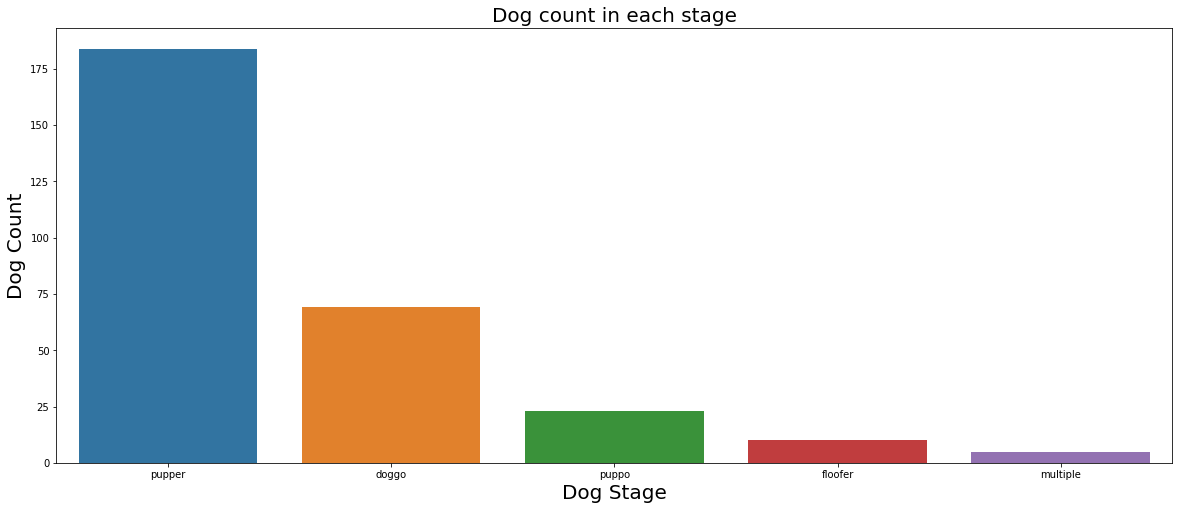

In [124]:
# Plot the bar graph to visualise the stages with higher number of dogs in twitter:

dog_stage = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [184, 69, 23, 10, 5]

plt.figure(figsize = (20,8))
sns.barplot(x = dog_stage, y = dog_counts)
plt.xlabel('Dog Stage', fontsize = 20)
plt.ylabel('Dog Count', fontsize = 20)
plt.title('Dog count in each stage', fontsize = 20);

From the above bar graph, it is clear that pupper is the most popular stage of dog on Twitter. However, let's dive deeper to see if the most popular stages are similar to the most favorite stage.

In [125]:
df.groupby('dog_stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1382.0,12.984631,48.727374,10.0,10.0,11.0,12.00,1776.0
doggo,69.0,11.971014,1.248187,10.0,11.0,12.0,13.00,14.0
floofer,10.0,11.800000,1.032796,10.0,11.0,12.0,12.75,13.0
multiple,5.0,12.000000,0.000000,12.0,12.0,12.0,12.00,12.0
pupper,184.0,11.343859,1.104677,10.0,10.0,11.0,12.00,14.0
puppo,23.0,12.173913,1.114050,10.0,12.0,12.0,13.00,14.0


In [126]:
df.groupby('dog_stage')['rating'].mean().sort_values(ascending=False)

dog_stage
None        12.984631
puppo       12.173913
multiple    12.000000
doggo       11.971014
floofer     11.800000
pupper      11.343859
Name: rating, dtype: float64

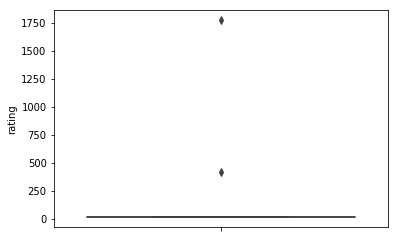

In [127]:
# Boxplot of rating
sns.boxplot(y = 'rating', data = df)
plt.show()

In [131]:
# See the 95 percentile value of rating:
np.percentile(df['rating'], 95)

13.0

From the descriptive statistics of rating and the above above box plot it is clear that there are outliers, since the max value is 1776 while the 95 percentile is only 13. We will delete the outliers.

In [132]:
# Only consider rating without outliers:
df = df[df['rating'] < 20]

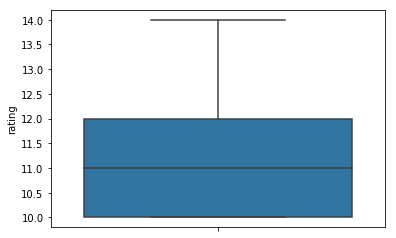

In [133]:
# Boxplot of rating
sns.boxplot(y = 'rating', data = df)
plt.show()

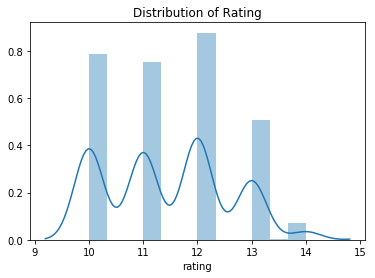

In [134]:
sns.distplot(df['rating'])
plt.title('Distribution of Rating')
plt.show()

In [137]:
# See percentile of rating of 10:
from scipy import stats
stats.percentileofscore(df['rating'], 10)

13.135846798324357

Thus, 87% of the dogs have the rating higher than 10 on the scale of 10. 

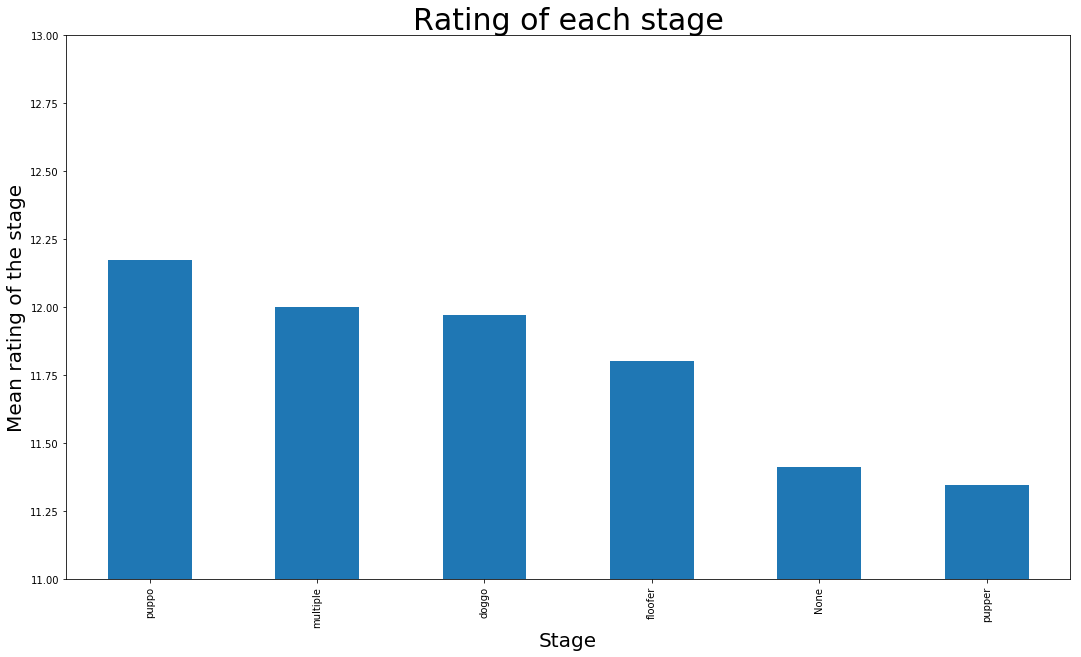

In [138]:
plt.figure(figsize = (18,10))
df.groupby('dog_stage')['rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Stage' , fontsize = 20)
plt.ylabel('Mean rating of the stage' , fontsize = 20)
plt.title('Rating of each stage',fontsize = 30)
plt.ylim(11,13);

As it is clear from the bar graph, whilst pupper is the most popular stage, the 3rd popular stage "puppo" is the stage with highest average rating on Twitter. The 'multiple' variable, denoting the tweets with 2 or more dogs from various stages, receives the second highest rating. It can be due to the combination of various dogs can receive higher ratings from people.

Now we will find out the most popular dog breed that are tweeted the most on Twitter:

In [141]:
popu_breed = df.prediction_of_dog_breed.value_counts().nlargest(30)

In [142]:
popu_breed = popu_breed.reset_index()

popu_breed.columns = ['breeds', 'count']

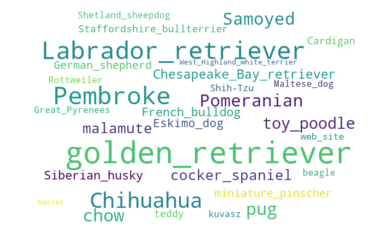

In [144]:
# Create dog names word cloud.
d = {}
for a, x in popu_breed.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

It can be seen that golden_retriever is the most popular breed, with the second and third position belongs to Pembroke and Labrador_retriever respectively.

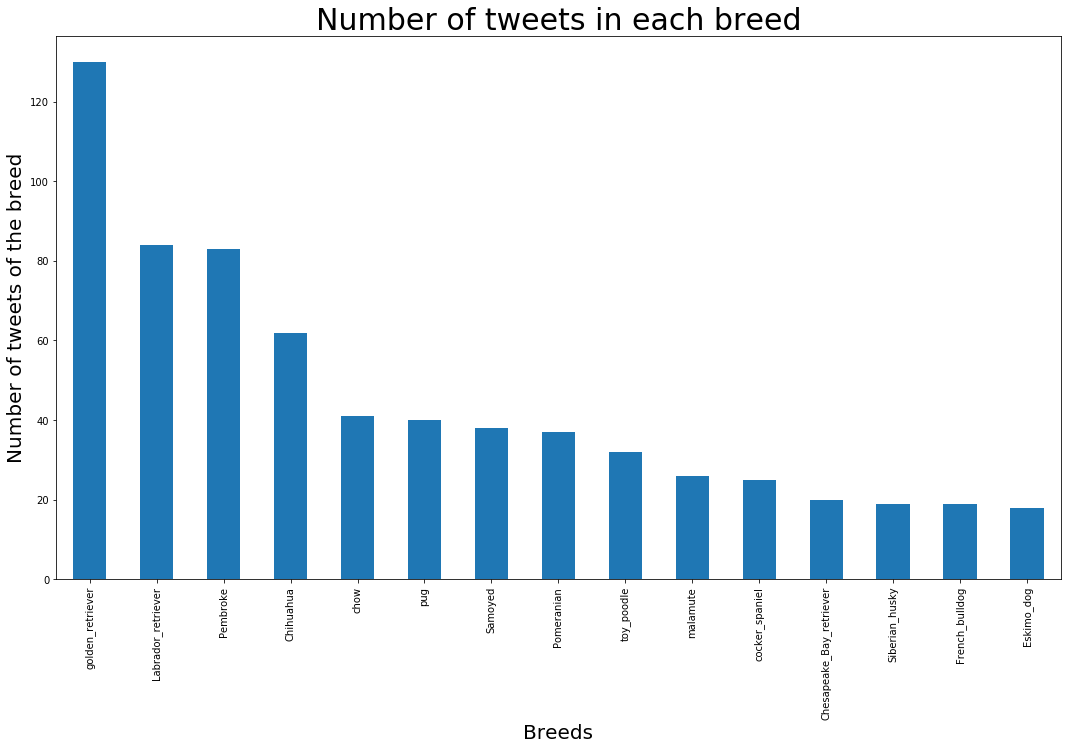

In [140]:
plt.figure(figsize = (18,10))
df.groupby('prediction_of_dog_breed').count()['tweet_id'].sort_values(ascending=False).nlargest(15).plot(kind='bar')
plt.xlabel('Breeds' , fontsize = 20)
plt.ylabel('Number of tweets of the breed' , fontsize = 20)
plt.title('Number of tweets in each breed',fontsize = 30)
plt.show();

Also, we will find out if the most popular breeds are also the breeds receiving highest ratings.

In [146]:
df.groupby('prediction_of_dog_breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
prediction_of_dog_breed,,,,,,,,
Afghan_hound,2.0,13.000000,0.000000,13.0,13.00,13.0,13.00,13.0
African_crocodile,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
African_grey,1.0,11.000000,NaN,11.0,11.00,11.0,11.00,11.0
Airedale,9.0,11.000000,0.866025,10.0,10.00,11.0,12.00,12.0
American_Staffordshire_terrier,11.0,11.090909,1.221028,10.0,10.00,11.0,12.00,13.0
Angora,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0
Appenzeller,1.0,13.000000,NaN,13.0,13.00,13.0,13.00,13.0
Arabian_camel,1.0,13.000000,NaN,13.0,13.00,13.0,13.00,13.0
Arctic_fox,3.0,11.000000,0.000000,11.0,11.00,11.0,11.00,11.0


In [147]:
df.groupby('prediction_of_dog_breed')['rating'].mean().sort_values(ascending=False).nlargest(15)

prediction_of_dog_breed
prison                     14.0
black-and-tan_coonhound    14.0
laptop                     14.0
limousine                  14.0
pedestal                   14.0
military_uniform           14.0
pole                       14.0
chimpanzee                 14.0
Bedlington_terrier         13.5
Afghan_hound               13.0
dough                      13.0
curly-coated_retriever     13.0
syringe                    13.0
restaurant                 13.0
revolver                   13.0
Name: rating, dtype: float64

It is quite surprising that the most popular breeds do not appear in the list of the highest rated breeds. Since the result might have been biased due to some outliers (the breeds with two many tweets), the author will trim the breeds with number of ratings lower than 15.

In [148]:
count = df.prediction_of_dog_breed.value_counts()

df2 = df[df.prediction_of_dog_breed.isin(count[count >= 15].index)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 1 to 1671
Data columns (total 14 columns):
tweet_id                    754 non-null int64
tweeted_timestamp           754 non-null object
source                      754 non-null object
tweeted_text                754 non-null object
expanded_urls               754 non-null object
dog_name                    541 non-null object
rating                      754 non-null float64
dog_stage                   754 non-null object
img_num                     754 non-null float64
prediction_of_dog_breed     754 non-null object
confidence_of_prediction    754 non-null float64
predicted_dog               754 non-null object
retweet_count               754 non-null int64
favorite_count              754 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 88.4+ KB


In [149]:
df2.groupby('prediction_of_dog_breed')['rating'].mean().sort_values(ascending = False).nlargest(15)

prediction_of_dog_breed
French_bulldog        12.052632
Samoyed               11.868421
golden_retriever      11.780769
Eskimo_dog            11.777778
Pembroke              11.771084
Cardigan              11.687500
chow                  11.609756
cocker_spaniel        11.480000
Chihuahua             11.467742
German_shepherd       11.411765
toy_poodle            11.375000
Siberian_husky        11.368421
Labrador_retriever    11.345238
miniature_pinscher    11.294118
teddy                 11.200000
Name: rating, dtype: float64

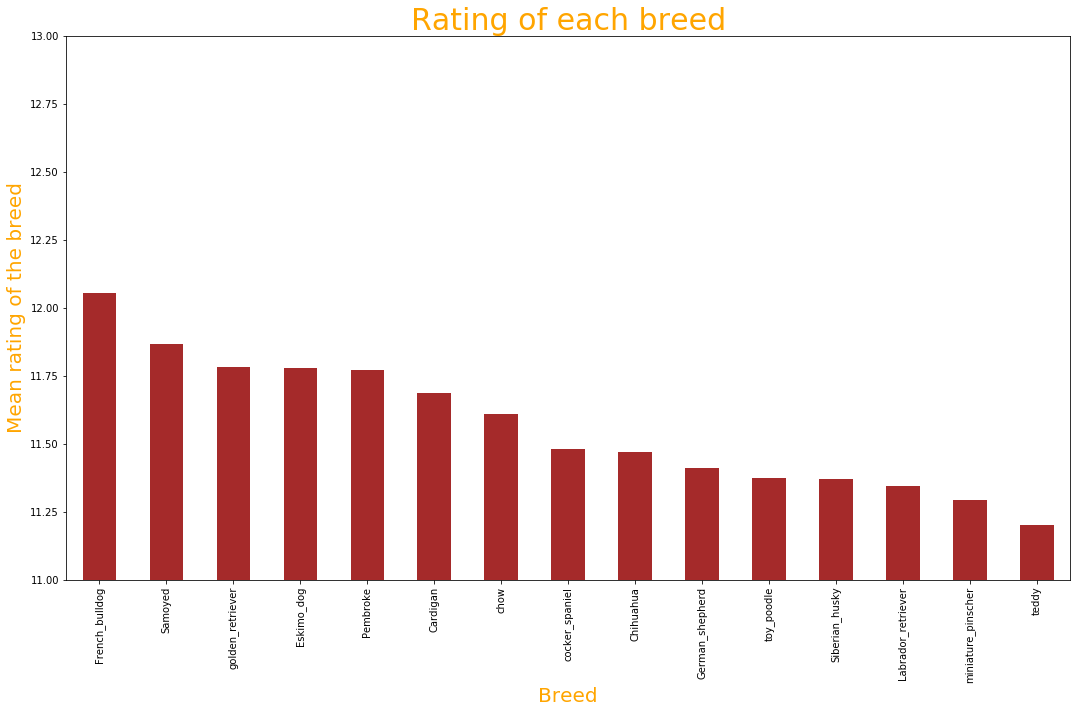

In [150]:
plt.figure(figsize = (18,10))
df2.groupby('prediction_of_dog_breed')['rating'].mean().sort_values(ascending=False).nlargest(15).plot(kind='bar', color = 'brown')
plt.xlabel('Breed' , fontsize = 20, color = 'orange')
plt.ylabel('Mean rating of the breed' , fontsize = 20, color = 'orange')
plt.title('Rating of each breed',fontsize = 30, color = 'orange')
plt.ylim(11,13);

Now, things become easier to understand. Although the order of rating is different, the most popular breeds appear in the list of the highest rated breeds after trimming the outliers. Such breeds as golden_retriever,       Pembroke, Labrador_retriever, Chihuahua and Samoyed, etc. appear in both charts.

In [151]:
#stages with highest numbers of retweet per tweet

df.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending = False)

dog_stage
puppo       6996.304348
doggo       6480.246377
multiple    5566.800000
floofer     3771.300000
None        2908.134058
pupper      2548.972826
Name: retweet_count, dtype: float64

In [152]:
#the most favorite stages

df.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending = False)

dog_stage
puppo       23254.521739
doggo       18463.391304
multiple    16653.000000
floofer     11017.600000
None        9786.986957 
pupper      7711.119565 
Name: favorite_count, dtype: float64

From the above data, it is clear that puppo and doggo are the stages which are retweeted and liked the most per tweet.

In [153]:
# Average favorite of each breed, using the df2 which are filtered out the breeds with too few ratings

average_like_df = round(df2.groupby('prediction_of_dog_breed')['favorite_count'].mean(),-1)
average_like_df.sort_values(ascending = False).nlargest(20)

prediction_of_dog_breed
French_bulldog               23210.0
Cardigan                     15260.0
Eskimo_dog                   14010.0
Samoyed                      12890.0
golden_retriever             12300.0
Labrador_retriever           11740.0
cocker_spaniel               11720.0
Pembroke                     11330.0
German_shepherd              10870.0
Chesapeake_Bay_retriever     10590.0
Chihuahua                    10320.0
miniature_pinscher           9860.0 
chow                         9560.0 
malamute                     9180.0 
Staffordshire_bullterrier    9030.0 
Pomeranian                   7400.0 
toy_poodle                   7180.0 
pug                          6960.0 
Siberian_husky               6730.0 
teddy                        5940.0 
Name: favorite_count, dtype: float64

It is obvious that French bulldog, Cardigan, Eskimo_dog, Samoyed, Labrador_retriever and golden_retriever are liked the most.

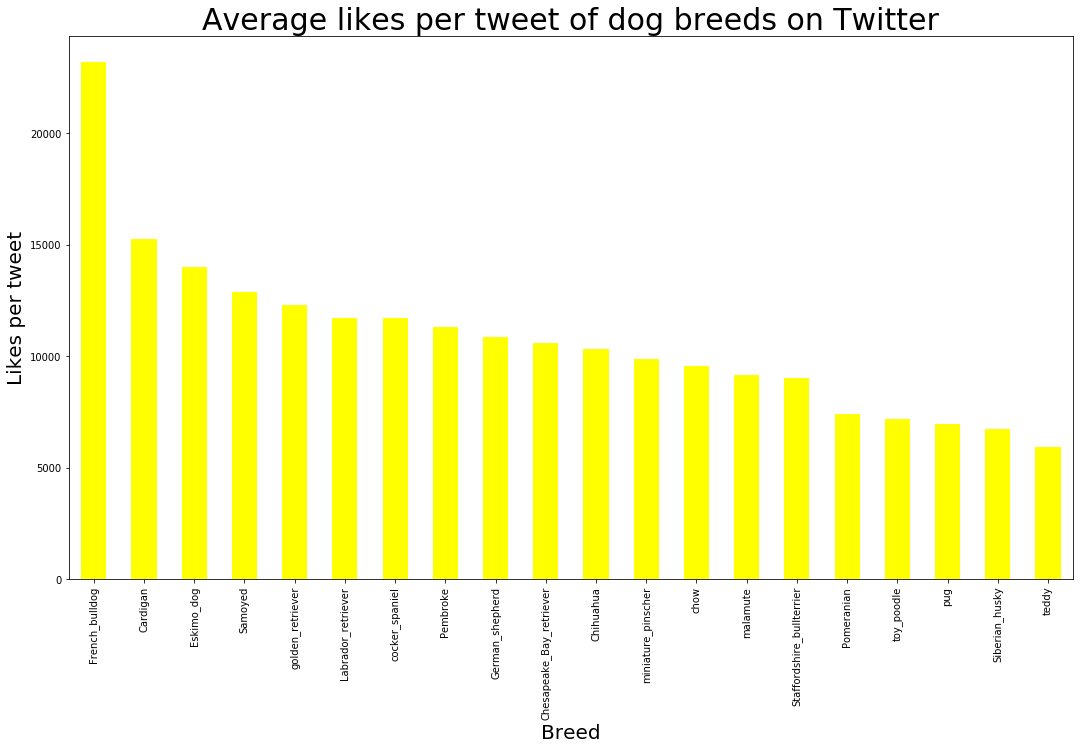

In [154]:
plt.figure(figsize = (18,10))
average_like_df.sort_values(ascending = False).nlargest(20).plot(kind='bar', color = 'yellow')
plt.xlabel('Breed' , fontsize = 20)
plt.ylabel('Likes per tweet' , fontsize = 20)
plt.title('Average likes per tweet of dog breeds on Twitter',fontsize = 30)
plt.show;

In [155]:
average_like_df = average_like_df.sort_values(ascending = False).nlargest(20).reset_index()

average_like_df.columns = ['breeds', 'count']

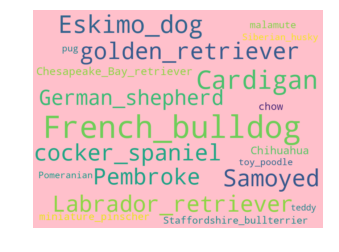

In [158]:
# Create dog names word cloud.
d = {}
for a, x in average_like_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 600, background_color = 'pink')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id='conclusions'></a>
## Conclusions

- In terms of dog stage, it is clear that pupper is the most popular stage of dog on Twitter. However, while being the 3rd popular stage, "puppo" is the stage with highest average rating on Twitter. puppo and doggo are also the stages which are retweeted and liked the most per tweet.
- Regarding breed, golden_retriever, Pembroke, Labrador_retriever, Chihuahua, chow, pug and Samoyed are the most popular breeds of dog on Twitter. But if ranking the breeds based on the rating, French_bulldog, Samoyed,           Eskimo_dog, Pembroke, golden_retriever are top 5 highest rated breeds. 
- Based on number of likes per tweet, French bulldog, Cardigan, Eskimo dog, Samoyed and golden retriever are the most favorite dog breeds.